<a href="https://colab.research.google.com/github/Helsonfs/Estudos_data_science_cvirus/blob/main/Estudos_Data_Science_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortos = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707


In [4]:
confirmados.shape

(279, 547)

In [5]:
confirmados['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object

In [6]:
last_date = '7/11/21'

confirmados[last_date]

0      131586
1      132592
2      146064
3       14075
4       39958
        ...  
274     30478
275    315160
276      6948
277    175729
278     67765
Name: 7/11/21, Length: 279, dtype: int64

In [7]:
confirmados['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
confirmados.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12024,12027,12052,12092,12092,12092,12199,12225,12242,12242,12242,12295,12295,12364,12379,12407,12407,12467,12467,12467,12467,12586,12586,12735,12735,12735,12735,12808,12889,12965,13024,13024,13024,13024,13024,13233,13274,13274,13404,13404
249,NaN,Timor-Leste,-8.874217,125.727539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7764,7941,8113,8145,8228,8285,8341,8412,8478,8504,8602,8678,8707,8728,8781,8843,8889,8912,8979,9035,9055,9118,9222,9278,9361,9425,9476,9512,9558,9594,9657,9710,9766,9823,9862,9906,9960,9997,10049,10100
182,NaN,Mauritius,-20.348404,57.552152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1458,1496,1496,1564,1566,1673,1701,1701,1701,1701,1701,1701,1701,1701,1701,1779,1779,1779,1833,1833,1833,1833,1833,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858
233,NaN,Solomon Islands,-9.645700,160.156200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
168,NaN,Liberia,6.428055,-9.429499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2290,2382,2382,2484,2484,2535,2575,2575,2729,2796,2834,2834,2995,3109,3109,3265,3265,3374,3529,3736,3794,3900,4093,4304,4520,4520,4520,4918,4918,4994,4994,5080,5102,5102,5215,5215,5276,5306,5306,5315
162,NaN,Kuwait,29.311660,47.481766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,26,...,320257,321648,323357,325014,326451,327963,329526,331013,332570,334216,335874,337371,339032,340967,342929,344799,346560,348262,349923,351481,353133,354851,356687,358511,360406,362018,363672,365649,367642,369227,370932,372549,374104,375594,377364,379076,380699,382084,383347,384573
105,NaN,Diamond Princess,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,61,64,135,135,175,175,218,285,355,454,542,621,634,634,634,691,691,691,705,...,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712,712
75,Jiangxi,China,27.614000,115.722100,2,7,18,18,36,72,109,109,162,240,286,333,391,476,548,600,661,698,740,771,804,844,872,900,913,925,930,933,934,934,934,934,934,934,934,934,...,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937
38,NaN,Cameroon,3.848000,11.502100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,79904,79904,79904,80090,80090,80090,80090,80090,80328,80328,80328,80328,80328,80328,80487,80487,80487,80487,80487,80487,80487,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,81467,81467
26,NaN,Bhutan,27.514200,90.433600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1724,1739,1769,1789,1808,1813,1826,1842,1854,1882,1889,1903,1924,1939,1963,1970,2006,2013,2027,2052,2062,2076,2100,2104,2122,2133,2159,2169,2210,2249,2252,2258,2266,2275,2290,2324,2370,2380,2398,2411


In [9]:
confirmados.set_index('Province/State').loc['Anhui']

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
7/13/21              1008
7/14/21              1008
7/15/21              1008
7/16/21              1008
7/17/21              1008
Name: Anhui, Length: 546, dtype: object

In [10]:
confirmados.set_index('Province/State').iloc[1]

Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
1/23/20                 0
                   ...   
7/13/21            132608
7/14/21            132616
7/15/21            132629
7/16/21            132647
7/17/21            132665
Name: nan, Length: 546, dtype: object

In [11]:
# valor palso pois é muito grande, não valos considerar essa análise pois há varios campos vazios (muita disparidade no padrão)

confirmados['Country/Region'].value_counts() 

China               34
Canada              16
United Kingdom      12
France              12
Australia            8
                    ..
Guinea-Bissau        1
Costa Rica           1
Panama               1
Marshall Islands     1
Niger                1
Name: Country/Region, Length: 195, dtype: int64

In [12]:
confirmados_por_pais = confirmados.groupby('Country/Region').sum()
confirmados_por_pais.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707


In [13]:
confirmados_por_pais.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Liberia,6.428055,-9.429499,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2290,2382,2382,2484,2484,2535,2575,2575,2729,2796,2834,2834,2995,3109,3109,3265,3265,3374,3529,3736,3794,3900,4093,4304,4520,4520,4520,4918,4918,4994,4994,5080,5102,5102,5215,5215,5276,5306,5306,5315
Sri Lanka,7.873054,80.771797,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,210661,213396,216134,218366,221277,223638,225922,228256,230692,233064,235413,237661,239689,241820,243913,246109,248050,249926,251751,253618,255508,257225,259089,260972,262795,264057,265630,266499,267433,268676,269946,271483,273031,274538,276106,277519,279059,280543,282060,283512
Mexico,23.634500,-102.552800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,2438011,2441866,2445538,2448820,2452469,2454176,2455351,2459601,2463390,2467643,2471741,2471741,2477283,2478551,2482784,2487747,2493087,2498357,2503408,2505792,2507453,2513164,2519269,2525350,2531192,2537457,2540068,2541873,2549862,2558369,2567821,2577140,2586721,2590500,2593574,2604711,2616827,2629648,2642068,2654699
Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,333820,336007,338048,339900,339900,339900,343604,345312,347157,349026,350630,350630,350630,354095,355620,357523,359266,361005,361005,361005,364304,366161,367938,369540,371206,371206,371206,374324,375812,377091,378938,380482,380482,380482,380482,385069,386722,388298,389798,389798
Paraguay,-23.442500,-58.443800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,379131,382231,384989,387687,389650,391436,393482,396149,398761,401243,403392,405075,406220,407721,409467,411615,413457,415320,416843,418330,419764,421589,423282,424998,426318,427542,428743,429884,431367,432801,434264,435522,436624,437719,438764,439897,441056,442207,443378,444427
Jamaica,18.109600,-77.297500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49031,49090,49110,49179,49232,49277,49356,49379,49429,49503,49564,49607,49668,49712,49735,49795,49841,49909,49964,50005,50054,50080,50124,50166,50242,50242,50242,50389,50404,50456,50497,50568,50629,50720,50757,50793,50848,50913,50983,51052
Panama,8.538000,-80.782100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,383733,384512,385353,386269,387127,387842,388325,389173,390221,391190,392166,393144,393727,394241,395449,396526,397727,398820,399877,400666,401332,402581,403778,404983,406013,407330,408123,408728,410004,411226,412466,413626,414647,415480,416232,417087,418604,419829,420916,421957
Madagascar,-18.766947,46.869107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41758,41786,41840,41869,41894,41933,41948,41966,41998,42034,42076,42087,42123,42137,42137,42161,42166,42194,42194,42194,42194,42207,42216,42247,42264,42288,42311,42329,42337,42358,42376,42392,42392,42392,42392,42462,42462,42479,42495,42520
Qatar,25.354800,51.183900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,218980,219138,219281,219466,219613,219730,219887,220033,220198,220325,220509,220693,220800,220930,221119,221273,221378,221465,221590,221692,221810,221953,222071,222217,222350,222453,222

In [14]:
confirmados_por_pais.loc['China'][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
7/13/21    104126.0
7/14/21    104157.0
7/15/21    104193.0
7/16/21    104224.0
7/17/21    104257.0
Name: China, Length: 543, dtype: float64

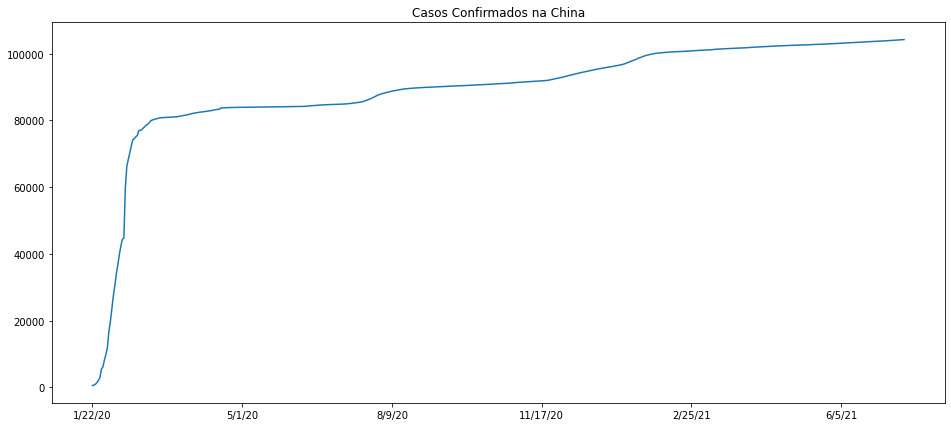

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,7))
confirmados_por_pais.loc['China'][2:].plot()
plt.title('Casos Confirmados na China')
plt.show()

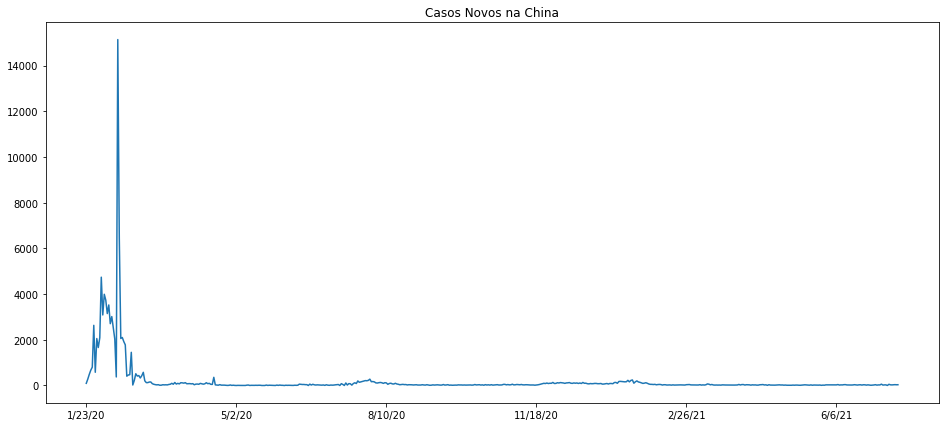

In [16]:
plt.figure(figsize=(16,7))
plt.title('Casos Novos na China')
novos_casos_china = confirmados_por_pais.loc['China'][2:].diff().dropna()
novos_casos_china.plot()

Text(0.5, 1.0, 'Confirmados por país')

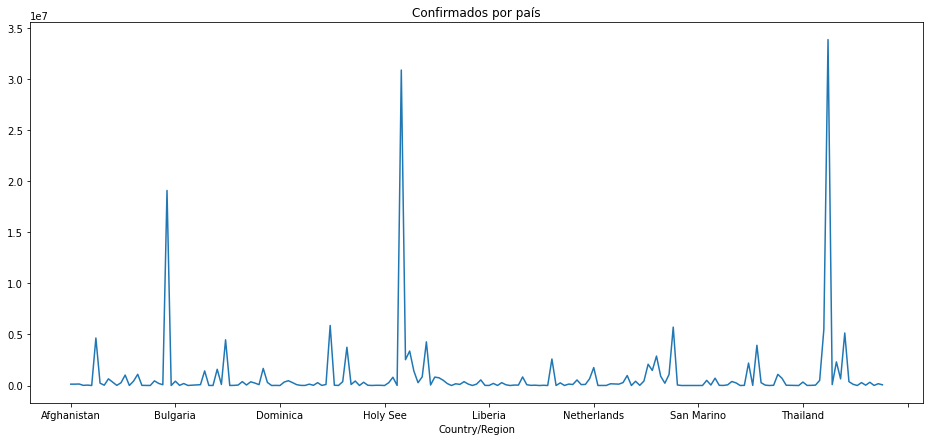

In [17]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].plot()
plt.title('Confirmados por país')

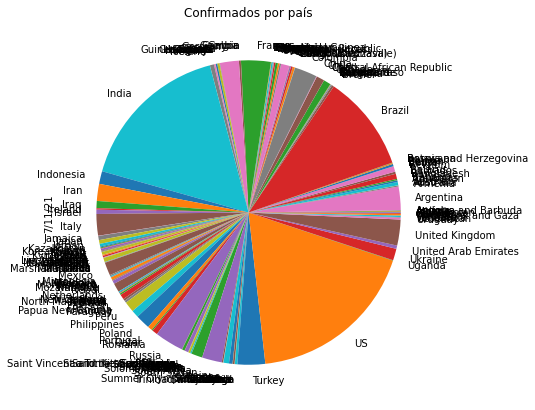

In [18]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].plot(kind = 'pie')
plt.title('Confirmados por país')
plt.show()

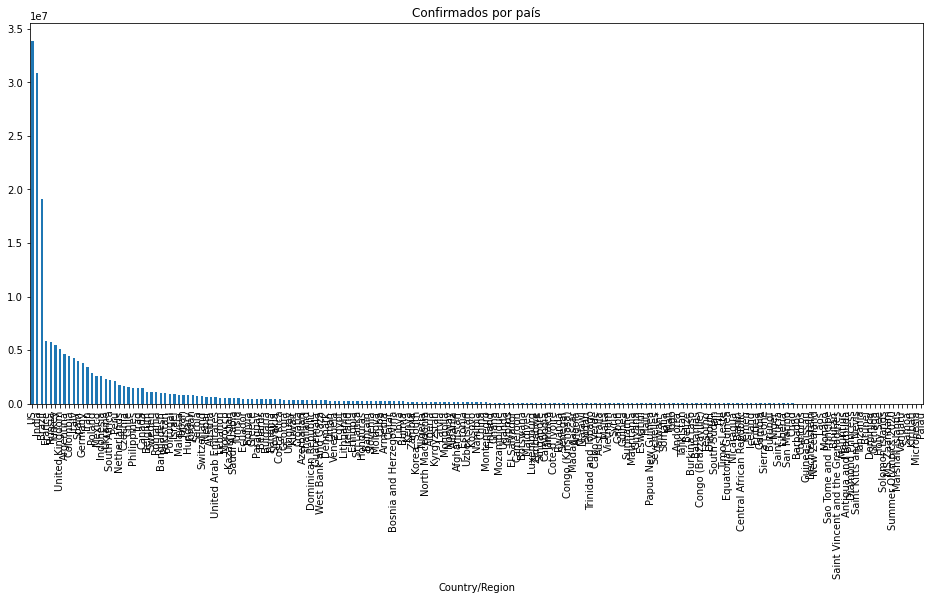

In [19]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Confirmados por país')
plt.show()

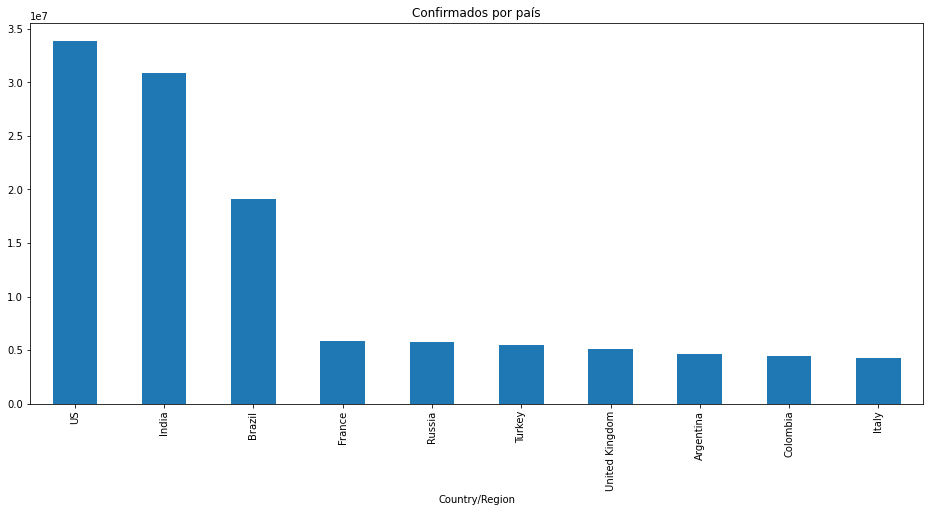

In [20]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.title('Confirmados por país')
plt.show()

In [21]:
display(mortos.head())
display(recuperados.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3251,3305,3356,3412,3449,3527,3612,3683,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983,5983
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2452,2452,2452,2453,2453,2453,2453,2454,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3537,3544,3552,3560,3565,3571,3579,3588,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,803,811,815,819,825,831,836,842,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,59569,59871,60280,60598,60939,61410,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129736,129761,129785,129807,129826,129842,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067,130072
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91651,91894,92132,92384,92620,92852,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397,104992
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13557,13569,13578,13591,13591,13591,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844,13844
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29368,29553,29960,30101,30207,30282,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724,34732


In [22]:
confirmados.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    131586
Albania        132592
Algeria        146064
Andorra         14075
Angola          39958
Name: 7/11/21, dtype: int64

In [23]:
mortos.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    5561
Albania        2456
Algeria        3836
Andorra         127
Angola          935
Name: 7/11/21, dtype: int64

In [24]:
recuperados.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan     81077
Albania        130050
Algeria        101430
Andorra         13770
Angola          34327
Name: 7/11/21, dtype: int64

In [25]:
def latest_por_pais(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

latest_por_pais(confirmados).head()

Country/Region
Afghanistan    137853
Albania        132665
Algeria        152210
Andorra         14273
Angola          40707
Name: 7/17/21, dtype: int64

In [26]:
def latest_por_pais_por_data(data, date):
  return data.groupby('Country/Region').sum()[date]


In [27]:
informacoes2 = [latest_por_pais_por_data(confirmados, '2/20/20'), latest_por_pais_por_data(mortos, '2/20/20'), latest_por_pais_por_data(recuperados, '2/20/20')]
combinados_2_20_20 = pd.concat(informacoes2, axis=1)
combinados_2_20_20.columns = ['confirmados', 'mortos', 'recuperados']

In [28]:
sum_up = combinados_2_20_20.loc['China']
letality_rate_1 = sum_up['mortos'] / sum_up['confirmados']
letality_rate_2 = sum_up['mortos'] / (sum_up['mortos'] + sum_up['recuperados'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.980939568709458
11.050760418724076


In [29]:
display(sum_up)

confirmados    75077
mortos          2238
recuperados    18014
Name: China, dtype: int64

In [30]:
combinados = pd.concat(informacoes2, axis=1)
combinados.columns = ['confirmados', 'mortos', 'recuperados']
combinados.head()

,confirmados,mortos,recuperados
Country/Region,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
Andorra,0,0,0
Angola,0,0,0


In [31]:
sum_up = combinados.sum()
letality_rate_1 = sum_up['mortos'] / sum_up['confirmados']
letality_rate_2 = sum_up['mortos'] / (sum_up['mortos'] + sum_up['recuperados'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.9496667191518395
11.00504234591472


In [32]:
letality_rate_1 = combinados['mortos'] / combinados['confirmados'] * 100
letality_rate_2 = combinados['mortos'] / (combinados['mortos'] + combinados['recuperados']) * 100
combinados['letality_rate_1'] = letality_rate_1
combinados['letality_rate_2'] = letality_rate_2
combinados.head()

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,0,0,0,NaN,NaN
Albania,0,0,0,NaN,NaN
Algeria,0,0,0,NaN,NaN
Andorra,0,0,0,NaN,NaN
Angola,0,0,0,NaN,NaN


In [33]:
combinados.sort_values('letality_rate_1', ascending=False).head()

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
Iran,5,2,0,40.000000,100.000000
Philippines,3,1,1,33.333333,50.000000
France,12,1,4,8.333333,20.000000
Taiwan*,24,1,2,4.166667,33.333333
China,75077,2238,18014,2.980940,11.050760


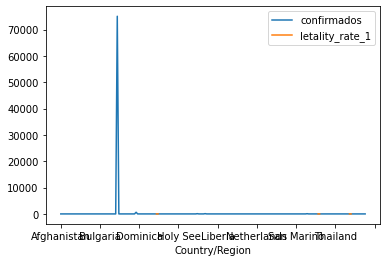

In [34]:
combinados[['confirmados', 'letality_rate_1']].plot()

In [35]:
import seaborn as sns

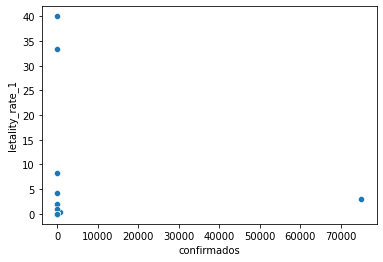

In [36]:
sns.scatterplot(data=combinados, x='confirmados', y='letality_rate_1')

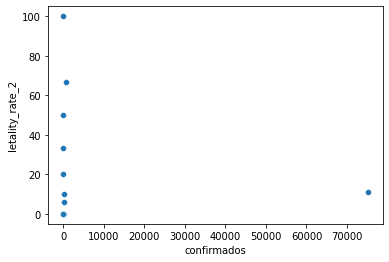

In [37]:
sns.scatterplot(data=combinados, x='confirmados', y='letality_rate_2')

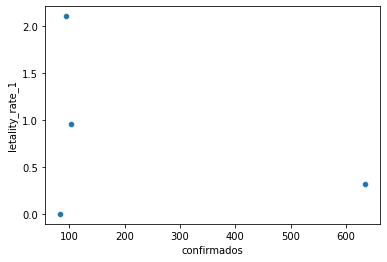

In [38]:
sns.scatterplot(data=combinados.query('confirmados > 40 and confirmados < 50000'), x='confirmados', y='letality_rate_1')

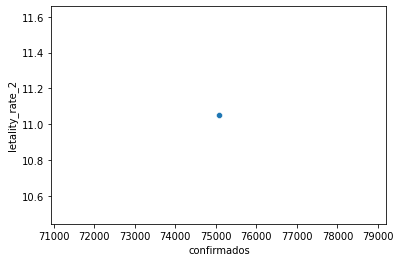

In [39]:
sns.scatterplot(data=combinados.query('recuperados > 40'), x='confirmados', y='letality_rate_2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


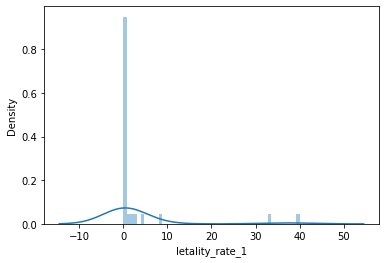

In [40]:
sns.distplot(combinados['letality_rate_1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


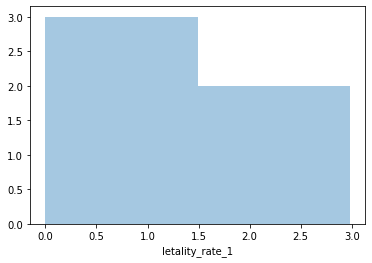

In [41]:
sns.distplot(combinados.query('confirmados > 40')['letality_rate_1'], kde=False)

In [42]:
combinados.sort_values('letality_rate_1', ascending=False).query('confirmados > 40').head(10)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
China,75077,2238,18014,2.980940,11.050760
Japan,95,2,18,2.105263,10.000000
"Korea, South",104,1,16,0.961538,5.882353
Diamond Princess,634,2,1,0.315457,66.666667
Singapore,84,0,34,0.000000,0.000000


In [43]:
combinados.sort_values('letality_rate_2', ascending=False).query('recuperados > 40').head(10)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
China,75077,2238,18014,2.98094,11.05076


In [44]:
informacoes3 = [latest_por_pais_por_data(confirmados, '2/8/20'), latest_por_pais_por_data(mortos, '2/20/20'), latest_por_pais_por_data(recuperados, '2/20/20')]
combinados_12 = pd.concat(informacoes3, axis=1)
combinados_12.columns = ['confirmados', 'mortos', 'recuperados']

sum_up = combinados_12.loc['China']
letality_rate_3 = sum_up['mortos'] / sum_up['confirmados']

print(letality_rate_3 * 100)

6.079208996577389


# Segunda parte

In [45]:
confirmados.set_index('Country/Region').loc['China'].sum().tail()

7/13/21    104126
7/14/21    104157
7/15/21    104193
7/16/21    104224
7/17/21    104257
dtype: object

In [46]:
e_china = confirmados['Country/Region'] == 'China'
e_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [47]:
confirmados['e_china'] = e_china
display(confirmados.head())
display(confirmados.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,e_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,False


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,e_china
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,9635,9835,10048,10337,10630,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,False
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,310544,311018,311018,311018,311534,311690,311948,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,False
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6832,6836,6856,6857,6862,6863,6864,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,False
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103763,105909,107974,110332,111746,113134,115824,118850,122244,125157,126973,129033,130631,133659,137026,140620,143215,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,184672,False
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39432,39496,39688,39852,39959,40077,40318,40556,40927,41335,41628,41779,42195,42714,43480,44306,45217,46018,46442,47284,48533,49864,51221,52663,53665,54474,56014,57963,60227,62383,65066,66853,67765,70426,73271,76381,78872,81168,82613,False


In [48]:
# query dos casos na China

confirmados.query('e_china == True')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,e_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1006,1006,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,1067,1068,1069,1069,1070,1071,1071,1072,1072,1073,1073,1075,1075,1075,1075,1076,1076,1077,1079,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1079,1079,1079,1079,1079,1083,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,601,601,601,601,601,601,601,601,601,601,601,601,601,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,632,635,636,637,637,638,638,641,646,650,651,652,659,660,661,661,665,669,672,675,677,680,685,686,688,688,689,690,692,692,692,692,696,698,699,700,700,704,708,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,True
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,2582,2593,2605,2618,2625,2635,2650,2657,2666,2680,2692,2699,2706,2709,2717,2723,2727,2728,2733,2736,2737,2737,2745,2748,2751,2756,2759,2764,2766,2769,2770,2770,2774,2777,2779,2791,2795,2796,2800,True
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,276,276,276,276,276,276,276,276,277,277,277,277,277,277,277,True
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,True
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,True
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317

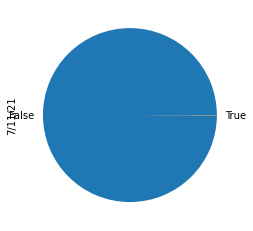

In [49]:
confirmados.groupby('e_china').sum()[last_date].plot(kind='pie')

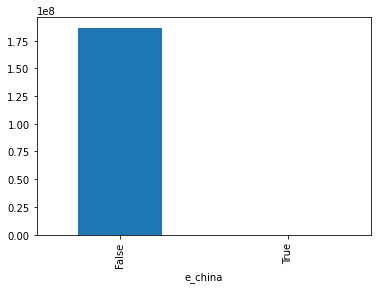

In [50]:
confirmados.groupby('e_china').sum()[last_date].plot(kind='bar')

## No dia 02/03/2020 China tinha 8 vezes o número de casos que o resto do mundo.

In [51]:
import numpy as np

In [52]:
confirmados['e_china_label'] = np.where(confirmados['e_china'], 'China', 'Outros')
display(confirmados.head())
display(confirmados.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,e_china,e_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,False,Outros
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,False,Outros
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,False,Outros
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,False,Outros
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,False,Outros


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,e_china,e_china_label
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,9835,10048,10337,10630,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,False,Outros
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,311018,311018,311018,311534,311690,311948,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,False,Outros
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6836,6856,6857,6862,6863,6864,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,False,Outros
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,105909,107974,110332,111746,113134,115824,118850,122244,125157,126973,129033,130631,133659,137026,140620,143215,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,184672,False,Outros
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39496,39688,39852,39959,40077,40318,40556,40927,41335,41628,41779,42195,42714,43480,44306,45217,46018,46442,47284,48533,49864,51221,52663,53665,54474,56014,57963,60227,62383,65066,66853,67765,70426,73271,76381,78872,81168,82613,False,Outros


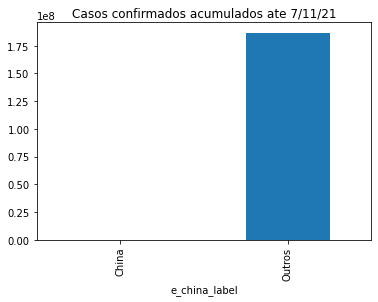

In [53]:
confirmados.groupby('e_china_label').sum()[last_date].plot(kind='bar')
plt.title(f'Casos confirmados acumulados ate {last_date}')
plt.show()

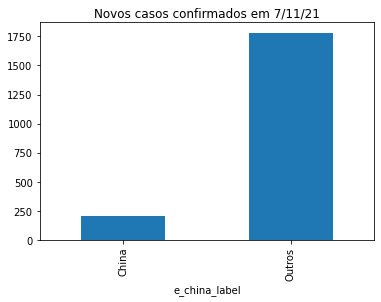

In [54]:
soma = confirmados.groupby('e_china_label').sum()
soma['delta'] = soma['3/2/20'] - soma['3/1/20']
soma['delta'].plot(kind='bar')
plt.title(f'Novos casos confirmados em {last_date}')
plt.show()

In [55]:
soma.T.head()

e_china_label,China,Outros
Lat,1085.2923,4539.266250
Long,3688.9377,2543.589914
1/22/20,548.0000,9.000000
1/23/20,643.0000,12.000000
1/24/20,920.0000,21.000000


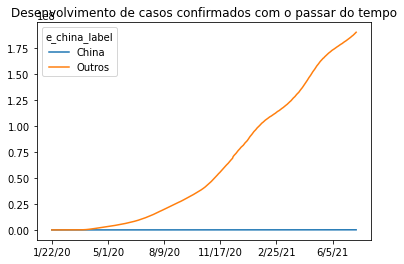

In [56]:
soma.T[2:-2].plot()
plt.title('Desenvolvimento de casos confirmados com o passar do tempo')
plt.show()

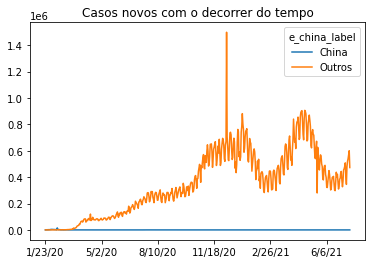

In [57]:
diferencas = soma.T[2:-2].diff().dropna()
diferencas.plot()
plt.title('Casos novos com o decorrer do tempo')
plt.show()

In [58]:
casos = confirmados.groupby('e_china_label').sum()[last_date].loc['China']
populacao_estimada = 1437525528
incidencia_de_casos = casos / populacao_estimada * 100000
incidencia_de_casos

# conta péssima, e ruim e errada.

7.239662738010173

In [59]:
un_populacao = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
un_populacao['PopTotal'] = un_populacao['PopTotal'] * 1000
un_populacao.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [60]:
un_populacao.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+08,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+09,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e+02,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+06,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+07,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+08,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+10,56025.839000


In [61]:
un_populacao_total = un_populacao.query('Time==2019')[['Location', 'PopTotal']].set_index('Location')
un_populacao_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [62]:
combinados.join(un_populacao_total)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2,PopTotal
Afghanistan,0,0,0,NaN,NaN,38041757.0
Albania,0,0,0,NaN,NaN,2880913.0
Algeria,0,0,0,NaN,NaN,43053054.0
Andorra,0,0,0,NaN,NaN,77146.0
Angola,0,0,0,NaN,NaN,31825299.0
...,...,...,...,...,...,...
Vietnam,16,0,7,0.0,0.0,NaN
West Bank and Gaza,0,0,0,NaN,NaN,NaN
Yemen,0,0,0,NaN,NaN,29161922.0
Zambia,0,0,0,NaN,NaN,17861034.0


In [63]:
combinados.join(un_populacao_total).sort_values('confirmados', ascending=False)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2,PopTotal
China,75077,2238,18014,2.980940,11.050760,1.433784e+09
Diamond Princess,634,2,1,0.315457,66.666667,NaN
"Korea, South",104,1,16,0.961538,5.882353,NaN
Japan,95,2,18,2.105263,10.000000,1.268603e+08
Singapore,84,0,34,0.000000,0.000000,5.804343e+06
...,...,...,...,...,...,...
Guinea,0,0,0,NaN,NaN,1.277125e+07
Guinea-Bissau,0,0,0,NaN,NaN,1.920917e+06
Guyana,0,0,0,NaN,NaN,7.827750e+05
Haiti,0,0,0,NaN,NaN,1.126308e+07


In [64]:
un_populacao_total.index[:5]

Index(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa'],
      dtype='object', name='Location')

In [65]:
un_populacao.query("Location.str.contains('Korea') and Time==2019", engine='python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
63418,408,Dem. People's Republic of Korea,2,Medium,2019,2019.5,12552.762,13113.396,25666158.0,213.156
202989,410,Republic of Korea,2,Medium,2019,2019.5,25649.457,25575.864,51225321.0,526.847


In [66]:
def rename_location(location):
  if location=='Republic of Korea':
    return 'Korea, South'
  return location

In [67]:
un_populacao_total['location_for_who'] = un_populacao_total.index.map(rename_location)
un_populacao_total.query("location_for_who=='Korea, South'").head()

,PopTotal,location_for_who
Location,,
Republic of Korea,51225321.0,"Korea, South"


In [68]:
combinados.join(un_populacao_total).sort_values("confirmados", ascending=False)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2,PopTotal,location_for_who
China,75077,2238,18014,2.980940,11.050760,1.433784e+09,China
Diamond Princess,634,2,1,0.315457,66.666667,NaN,NaN
"Korea, South",104,1,16,0.961538,5.882353,NaN,NaN
Japan,95,2,18,2.105263,10.000000,1.268603e+08,Japan
Singapore,84,0,34,0.000000,0.000000,5.804343e+06,Singapore
...,...,...,...,...,...,...,...
Guinea,0,0,0,NaN,NaN,1.277125e+07,Guinea
Guinea-Bissau,0,0,0,NaN,NaN,1.920917e+06,Guinea-Bissau
Guyana,0,0,0,NaN,NaN,7.827750e+05,Guyana
Haiti,0,0,0,NaN,NaN,1.126308e+07,Haiti


In [69]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,e_china,e_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,False,Outros
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,False,Outros
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,False,Outros
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,False,Outros
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,False,Outros


In [89]:
grupo_por_dia = pd.DataFrame([confirmados.sum()[3:-2], recuperados.sum()[3:], mortos.sum()[3:]],
             index=["confirmados", "recuperados", "mortos"]).T

grupo_por_dia.head()

,confirmados,recuperados,mortos
1/22/20,557,30,17
1/23/20,655,32,18
1/24/20,941,39,26
1/25/20,1433,42,42
1/26/20,2118,56,56


In [97]:
grupo_por_dia['letalidade_por_dia1'] = grupo_por_dia['mortos'] / grupo_por_dia['confirmados'] * 100
grupo_por_dia['letalidade_por_dia2'] = grupo_por_dia['mortos'] / (grupo_por_dia['mortos'] + grupo_por_dia['recuperados']) * 100

In [98]:
grupo_por_dia.head()

,confirmados,recuperados,mortos,letalidade_por_dia1,letalidade_por_dia2
1/22/20,557,30,17,3.052065,36.170213
1/23/20,655,32,18,2.748092,36.000000
1/24/20,941,39,26,2.763018,40.000000
1/25/20,1433,42,42,2.930914,50.000000
1/26/20,2118,56,56,2.644004,50.000000


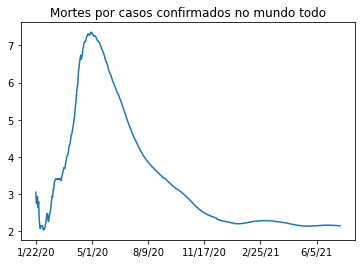

In [101]:
grupo_por_dia['letalidade_por_dia1'].plot()
plt.title("Mortes por casos confirmados no mundo todo")
plt.show()

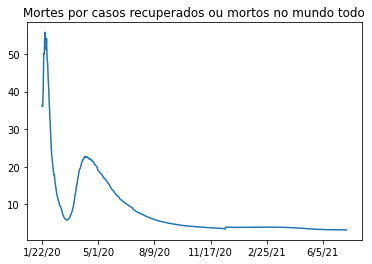

In [102]:
grupo_por_dia['letalidade_por_dia2'].plot()
plt.title("Mortes por casos recuperados ou mortos no mundo todo")
plt.show()

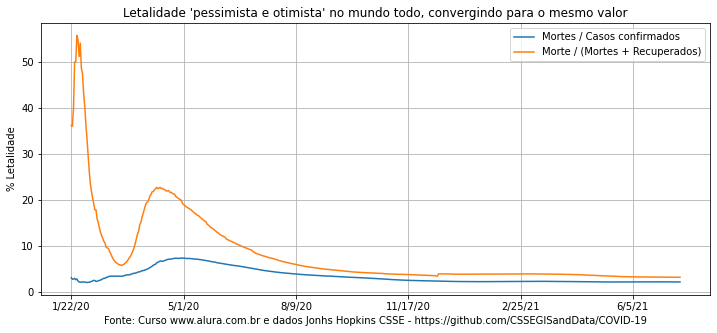

In [112]:
plt.figure(figsize=(12,5))
grupo_por_dia['letalidade_por_dia1'].plot()
ax = grupo_por_dia['letalidade_por_dia2'].plot()
plt.legend(['Mortes / Casos confirmados', 'Morte / (Mortes + Recuperados)'])
plt.title("Letalidade 'pessimista e otimista' no mundo todo, convergindo para o mesmo valor")
plt.grid(linestyle='-')
ax.set_xlabel("Fonte: Curso www.alura.com.br e dados Jonhs Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19")
ax.set_ylabel("% Letalidade")
plt.show()